In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

Text(0.5, 1.0, 'gender count')

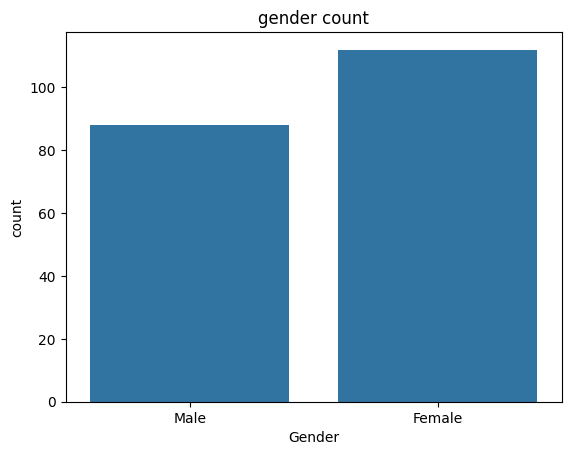

In [10]:
sns.countplot(x="Gender",data=df)
plt.title("gender count")

In [11]:
df.drop(["CustomerID","Gender"],axis=1,inplace=True)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [12]:
x=df.iloc[:]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [13]:
#clusters forming
#k=? ==> elbow point
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11): #random value 
    data=KMeans(n_clusters=i,init="k-means++",random_state=42) # init==> to initialise k means alg 
    data.fit(df)
    wcss.append(data.inertia_) # inertia==> to calculate variance 



Text(0.5, 1.0, 'elbow points')

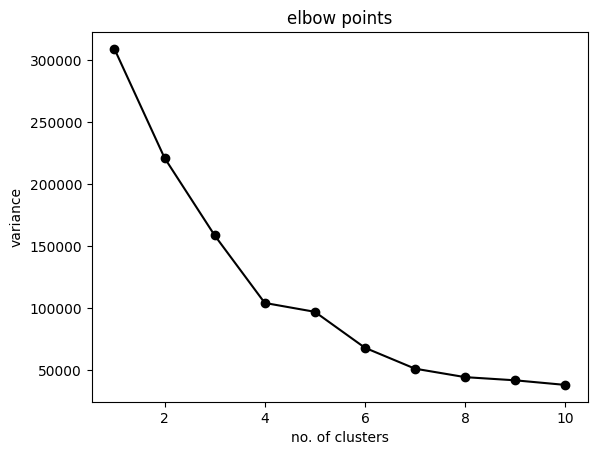

In [14]:
plt.plot(range(1,11),wcss,color="k",marker="o") # either x as list of 1 to 10 or in range , y variance list
plt.xlabel("no. of clusters")
plt.ylabel("variance")
plt.title("elbow points")
#elbow point =7(constant from that point) ,k=7

In [15]:
#no .of clusters=7
data1=KMeans(n_clusters=7,init="k-means++",random_state=42)
data1.fit(df)
y_pred=data1.predict(df)
y_pred

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 5, 2,
       5, 2, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 6,
       0, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 6, 0, 0, 6,
       6, 0, 0, 6, 0, 6, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 6, 0, 0, 0, 0,
       0, 6, 6, 6, 6, 6, 0, 0, 0, 0, 6, 6, 6, 4, 6, 4, 6, 4, 3, 4, 3, 4,
       6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 6, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [16]:
df["Clusters"]=y_pred
df

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,5
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,1
196,45,126,28,3
197,32,126,74,1
198,32,137,18,3


In [17]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [20]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
y_pred1

array([6, 5, 5, 0, 3, 3, 6, 5, 2, 3, 4, 5, 2, 0, 0, 0, 4, 2, 3, 0, 6, 5,
       5, 6, 2, 3, 5, 5, 1, 2, 6, 4, 3, 4, 3, 6, 3, 0, 6, 3, 0, 0, 1, 5,
       0, 2, 6, 2, 4, 6, 0, 4, 0, 0, 2, 4, 4, 0, 1, 3], dtype=int32)

In [27]:
print(model.predict(scaler.transform([[20,16,50]])))

[2]


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred1)
cm

array([[13,  0,  0,  0,  0,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  9]])

In [23]:
score=accuracy_score(y_test,y_pred1)
score

0.9833333333333333

In [24]:
report=classification_report(y_test,y_pred1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         8
           5       0.89      1.00      0.94         8
           6       1.00      1.00      1.00         9

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.99        60
weighted avg       0.99      0.98      0.98        60

